In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ncaa =pd.read_csv('ncaa.csv')
ncaa

,Year,Round,Region Number,Region Name,Seed,Score,Team,Team.1,Score.1,Seed.1
0,1985,1,1,West,1,83,St Johns,Southern,59,16
1,1985,1,1,West,2,81,VCU,Marshall,65,15
2,1985,1,1,West,3,65,NC State,Nevada,56,14
3,1985,1,1,West,4,85,UNLV,San Diego St,80,13
4,1985,1,1,West,5,58,Washington,Kentucky,65,12
...,...,...,...,...,...,...,...,...,...,...
2200,2019,4,3,East,1,67,Duke,Michigan St,68,2
2201,2019,4,4,Midwest,2,71,Kentucky,Auburn,77,5
2202,2019,5,1,Final Four,1,63,Virginia,Auburn,62,5
2203,2019,5,2,Final Four,2,51,Michigan St,Texas Tech,61,3


In [3]:
ncaa['Score Difference']=ncaa['Score']-ncaa['Score.1']
ncaa.loc[ncaa['Score Difference'] >0, 'Winner']=ncaa['Team']
ncaa.loc[ncaa['Score Difference'] <0, 'Winner']=ncaa['Team.1']
ncaa.loc[ncaa['Score Difference'] >0, 'Winner Seed']=ncaa['Seed']
ncaa.loc[ncaa['Score Difference'] <0, 'Winner Seed']=ncaa['Seed.1']

In [4]:
ncaa.to_csv('ncaa1.csv')

In [ ]:
q6=ncaa.loc[ncaa['Round']==1].copy()
Teams=pd.concat([q6['Team'],q6['Team.1']])
Seeds=pd.concat([q6['Seed'],q6['Seed.1']])
df2 = pd.DataFrame({'Team':Teams, 'Seeds':Seeds})
df2

Find all schools that have won the championship, and make a table that includes the school and number of championships, sorted from most to least.

In [7]:
q1=ncaa[ncaa['Region Name']=='Championship']
#getting the championship round
answer1=q1['Winner'].value_counts()
#getting the winning team from jsut the championship round
answer1

Duke              5
North Carolina    4
Connecticut       4
Villanova         3
Kentucky          3
Louisville        2
Florida           2
Kansas            2
Michigan          1
Michigan St       1
Arkansas          1
UNLV              1
Indiana           1
Maryland          1
Arizona           1
Virginia          1
Syracuse          1
UCLA              1
Name: Winner, dtype: int64

 Find the number of tournament appearances for each school, then make a table of all schools that have appeared at least 25 times, sorted from most to fewest appearances.

In [8]:
q2=ncaa.loc[ncaa['Round']==1, ['Team', 'Team.1']]
#getting just round 1 so you don't double count and the two team columns
teams=pd.concat([q2['Team'],q2['Team.1']])
#merging the team columns
q2a=teams.value_counts()
#getting the value counts
q2a[q2a >=25]

Duke              34
Kansas            34
Arizona           32
North Carolina    32
Kentucky          30
Michigan St       29
Syracuse          28
Purdue            26
Louisville        26
Texas             26
Oklahoma          26
UCLA              25
Xavier            25
Indiana           25
dtype: int64

Find all years when the school that won the tournament was seeded 3 or lower. 
(Remember that "lower" seed means a bigger number!) Give   a table that includes the year, the school name, and the seed, sorted by year from least to most recent.

In [10]:
answer3=q1.loc[q1['Winner Seed'] >=3]
#getting the winner seeds greater than 1
q3=answer3['Year'].groupby([answer3['Year'],answer3['Winner'],answer3['Winner Seed']]).count()
#geting the year, the winner, and the seed grouped by year
q3

Year  Winner       Winner Seed
1985  Villanova    8.0            1
1988  Kansas       6.0            1
1989  Michigan     3.0            1
1997  Arizona      4.0            1
2003  Syracuse     3.0            1
2006  Florida      3.0            1
2011  Connecticut  3.0            1
2014  Connecticut  7.0            1
Name: Year, dtype: int64

Determine the average tournament seed for each school.  Make a table of all schools that have an average seed of 5.0 or higher (that is, the average seed number is <= 5.0).  Sort the table highest to lowest average seed. Just for round 1

In [11]:
q3=df2['Seeds'].groupby(df2['Teams']).mean().sort_values(ascending=True)
#getting the teams seeds grouped by team, the average, getting them from lowest to highest
q3[q3 <=5].sort_values(ascending=False)

Teams
Washington St      5.000000
Louisville         5.000000
TCU                5.000000
Miss. St           5.000000
Drake              5.000000
Florida            4.954545
Maryland           4.952381
Michigan St        4.827586
Michigan           4.809524
Virginia           4.722222
Georgetown         4.666667
Wake Forest        4.642857
Ohio St            4.450000
Arizona            4.437500
Syracuse           4.428571
Massachusetts      4.375000
Loyola Illinois    4.000000
Connecticut        3.950000
Kentucky           3.566667
North Carolina     2.718750
Kansas             2.500000
Duke               2.176471
Name: Seeds, dtype: float64

Give a table of the percentage of wins by the team seeded higher by round, sorted by round in order 1, 2, ..., 6. (Remember, a higher seed means a lower seed number.)

In [12]:
ncaa.loc[ncaa['Score Difference']>0, 'Loser Seed']=ncaa['Seed.1']
ncaa.loc[ncaa['Score Difference']<0, 'Loser Seed']=ncaa['Seed']
#filtering out the seeds of those who lost
q5=ncaa.loc[ncaa['Winner Seed'] < ncaa['Loser Seed']]
#getting the seeds of the winners who were seeded higher
q5num=q5['Winner'].groupby(q5['Round']).count()
#creating the numerator which is winner grouped by round for the winners seeded higher
q5denom=ncaa['Winner'].groupby(ncaa['Round']).count()
q5num/q5denom*100

Round
1    74.285714
2    71.250000
3    71.428571
4    55.000000
5    48.571429
6    57.142857
Name: Winner, dtype: float64

For the first round, determine the percentage of wins by the higher seed for the 1-vs-16 games, for the 2-vs-15 games, ..., for the 8-vs-9 games.  Give a table of the above groupings and the percentage, sorted in the order given.  (Yes, a higher seed still means a lower seed number.)

In [13]:
q6=ncaa.loc[ncaa['Round']==1].copy()
#getting just the round 1
q6['Higher Seed Wins']=0
#creating a blank column
q6.loc[q6['Winner Seed'] <=8 , 'Higher Seed Wins']=1
#saying if the winning seed is 8 or less, put a one in the empty column
answer6=q6['Higher Seed Wins'].groupby([q6['Seed']]).sum()
#summing the winning seeds by original seed
denom6=np.sum(q6['Seed']==1)
#getting the denominator
answer6/denom6*100

Seed
1    99.285714
2    94.285714
3    85.000000
4    79.285714
5    64.285714
6    62.857143
7    60.714286
8    48.571429
Name: Higher Seed Wins, dtype: float64

For each seed 1, 2, 3, ..., 16, determine the average number of games won per tournament by a team with that seed.  Give a table with seed number and average number of wins, sorted by seed number 1, 2, 3, ...(Hint: There are 35 tournaments in the data set, and each tournament starts with 4 teams of each seed.  We are not including "play-in" games which are not part of the data set.)

In [14]:
q7=ncaa['Winner Seed'].value_counts().sort_index()
#getting the winner seeds value counts sorted by index
avgwins=q7/(35*4)
#getting the table divided by the 35 tournaments with the 4 teams
avgwins

1.0     3.350000
2.0     2.371429
3.0     1.864286
4.0     1.535714
5.0     1.114286
6.0     1.071429
7.0     0.907143
8.0     0.700000
9.0     0.600000
10.0    0.621429
11.0    0.614286
12.0    0.514286
13.0    0.250000
14.0    0.164286
15.0    0.064286
16.0    0.007143
Name: Winner Seed, dtype: float64

For each champion, determine their average margin of victory across all of their games. Make a table of teams with an average victory marginof at least 15.0.  Include the year, the school and the average victory margin, sorted from highest to lowest average victory margin.

In [15]:
ncaa['Year']=ncaa['Year'].astype(str)
#converting the year to string
ncaa['Win/Year']=ncaa['Winner'].str.cat(ncaa['Year'], sep='/')
#getting the winner for each year 
q8=ncaa.set_index('Win/Year')
#getting the index set to winner per year
champions=pd.DataFrame(q1['Winner'])
#getting a new dataframe with winner in it
champions['Year']=q1['Year'].astype(str)
#getting the year changed to a string
champions['Win/Year']=champions['Winner'].str.cat(champions['Year'],sep='/')
#getting the winner for each year
champions1=champions.set_index('Win/Year')
#getting the index set to winner per year
championsdata=champions1.merge(q8, left_index=True, right_index=True)
#getting the two data sets merged together 
championsdata['Score Difference']=abs(championsdata['Score Difference'])
#getting the absolute value of the score difference
championsdata.reset_index(inplace=True)
#resetting the index
margins=championsdata['Score Difference'].groupby(championsdata['Win/Year']).mean()
#getting the mean score difference grouped by winner each year
margins[margins >=15].sort_values(ascending=False)

Win/Year
Kentucky/1996          21.500000
Villanova/2016         20.666667
North Carolina/2009    20.166667
UNLV/1990              18.666667
Villanova/2018         17.666667
Duke/2001              16.666667
Louisville/2013        16.166667
Florida/2006           16.000000
North Carolina/1993    15.666667
Duke/2015              15.500000
Michigan St/2000       15.333333
Name: Score Difference, dtype: float64

For each year of the tournament, determine the average margin of victory for each round.  Then make a histogram of these averages,using 16 bins and a range of [0,32].

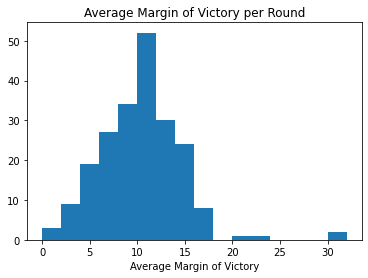

In [17]:
ncaa['Score Diff Pos']=ncaa['Score Difference'].abs()
#making all the scores positive
q10=ncaa['Score Diff Pos'].groupby([ncaa['Year'], ncaa['Round']]).mean()
##getting the scores grouped by year and round
plt.hist(q10, bins=16, range=[0,32])   
plt.title('Average Margin of Victory per Round')
plt.xlabel("Average Margin of Victory")
plt.show()

Produce side-by-side box-and-whisker plots, one using the Round 1 margin of victory for games where the higher seed wins, and one using the Round 1 margin of victory for games where the lower seed wins.  (Remember that higher seed = lower seed number.) Orient the boxes vertically with the higher seed win data on the left.

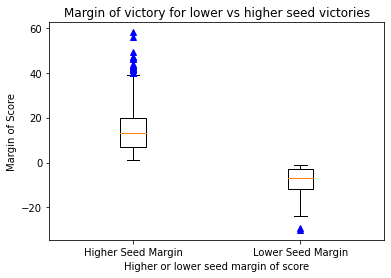

In [18]:
q11=ncaa.loc[ncaa['Round']==1]
#getting just the first round
q11a=q11.loc[q11['Winner Seed']< q11['Loser Seed']]
#getting the higher seed
q11aa=q11a['Score Difference']
#getting the score difference
q11b=q11.loc[q11['Winner Seed']> q11['Loser Seed']]
#getting the winner seed greater than the loser seed
q11bb=q11b['Score Difference']
subset=[q11aa, q11bb]
plt.boxplot(subset, sym='b^')
plt.xticks([1,2], ['Higher Seed Margin', 'Lower Seed Margin'])
plt.xlabel("Higher or lower seed margin of score")
plt.ylabel("Margin of Score")
plt.title('Margin of victory for lower vs higher seed victories')
plt.show()

Produce a bar chart for the number of Round 2 victories by seed. The bars should proceed left to right by seed number 1, 2, 3, ...

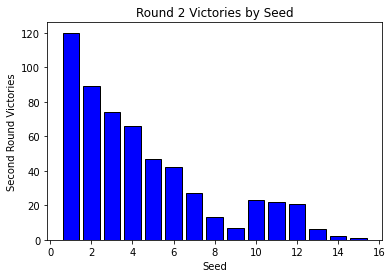

In [19]:
q12=ncaa.loc[ncaa['Round']==2]
#getting the second round 
q12a=q12['Winner Seed'].value_counts()
#getting the higher seed value counts 
counts=q12a.index
plt.bar(counts, q12a, color='blue', edgecolor='black')
plt.xlabel("Seed")
plt.ylabel("Second Round Victories")
plt.title('Round 2 Victories by Seed')
plt.show()